# **Examen Final: Análisis de Datos y Procesamiento Usando Python**

**Nombres:** Katherin Juliana Moreno Carvajal, Juan David Cetina Gómez y Mariana Salas Gutiérrez

## **Sección 1: Definición del Problema y Dataset**

Base de Datos, objetivo, justificación de variables, problema

In [563]:
# Importar las librerías para manejar y analizar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os
from sklearn.preprocessing import LabelEncoder

In [564]:
base_dir = "base"

carpetas_meses = [
    "Ene_2024", "Febrero_2024", "Marzo_2024", "Abril_2024", "Mayo_2024", "Junio_2024",
    "Julio_2024", "Agosto_2024", "Septiembre_2024", "Octubre_2024", "Noviembre_2024", "Diciembre_2024"
]

# Nombres de los archivos
archivos = {
    "ocupados": "Ocupados.CSV",
    "otras_formas_trabajo": "Otras formas de trabajo.CSV",
    "otros_ingresos": "Otros ingresos e impuestos.CSV",
    "caracteristicas": "Características generales, seguridad social en salud y educación.CSV",
    "hogar": "Datos del hogar y la vivienda.CSV",
    "fuerza": "Fuerza de trabajo.CSV",
}

# Diccionario para guardar los DataFrames por mes y tipo
dataframes_por_mes = {}

for carpeta in carpetas_meses:
    mes_key = carpeta.replace(" ", "_")
    ruta_csv = os.path.join(base_dir, carpeta, "CSV")
    dataframes_por_mes[mes_key] = {}

    for nombre_archivo, archivo in archivos.items():
        ruta_archivo = os.path.join(ruta_csv, archivo)

        try:
            df = pd.read_csv(ruta_archivo, sep=";", encoding="latin1", low_memory=False)
            dataframes_por_mes[mes_key][nombre_archivo] = df
            print(f"Cargado: {mes_key} -> {nombre_archivo} ({df.shape[0]} filas)")
        except FileNotFoundError:
            print(f"Archivo no encontrado: {mes_key} -> {nombre_archivo}")
        except Exception as e:
            print(f"Error en {mes_key} -> {nombre_archivo}: {e}")

Cargado: Ene_2024 -> ocupados (28815 filas)
Cargado: Ene_2024 -> otras_formas_trabajo (55738 filas)
Cargado: Ene_2024 -> otros_ingresos (55738 filas)
Cargado: Ene_2024 -> caracteristicas (70648 filas)
Cargado: Ene_2024 -> hogar (24247 filas)
Cargado: Ene_2024 -> fuerza (55738 filas)
Cargado: Febrero_2024 -> ocupados (29943 filas)
Cargado: Febrero_2024 -> otras_formas_trabajo (56856 filas)
Cargado: Febrero_2024 -> otros_ingresos (56856 filas)
Cargado: Febrero_2024 -> caracteristicas (72148 filas)
Cargado: Febrero_2024 -> hogar (24743 filas)
Cargado: Febrero_2024 -> fuerza (56856 filas)
Cargado: Marzo_2024 -> ocupados (29638 filas)
Cargado: Marzo_2024 -> otras_formas_trabajo (56063 filas)
Cargado: Marzo_2024 -> otros_ingresos (56063 filas)
Cargado: Marzo_2024 -> caracteristicas (70719 filas)
Cargado: Marzo_2024 -> hogar (24647 filas)
Cargado: Marzo_2024 -> fuerza (56063 filas)
Cargado: Abril_2024 -> ocupados (29741 filas)
Cargado: Abril_2024 -> otras_formas_trabajo (55696 filas)
Cargado:

In [565]:
llaves = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']

# Crear un diccionario para guardar el df final de cada mes
df_por_mes = {}

for mes, data in dataframes_por_mes.items():
    try:
        print(f"\nProcesando merges para: {mes}")

        # Asignar cada dataframe del mes
        df_fuerza = data.get("fuerza")
        df_ingresos = data.get("otros_ingresos")
        df_otras = data.get("otras_formas_trabajo")
        df_ocup = data.get("ocupados")
        df_caract = data.get("caracteristicas")
        df_hogar = data.get("hogar")

        if df_fuerza is None or df_ingresos is None:
            print(f"No se puede procesar {mes} por falta de datos clave (fuerza o ingresos)")
            continue

        # 1. Merge fuerza + ingresos
        cols_fuerza = [col for col in df_fuerza.columns if col not in df_ingresos.columns or col in llaves]
        fuerza_ingresos = df_fuerza[cols_fuerza].merge(df_ingresos, on=llaves, how='outer')

        # 2. Otras formas
        if df_otras is not None:
            cols_otras = [col for col in df_otras.columns if col not in fuerza_ingresos.columns or col in llaves]
            df_unido = fuerza_ingresos.merge(df_otras[cols_otras], on=llaves, how='outer')
        else:
            df_unido = fuerza_ingresos

        # 3. Ocupados
        if df_ocup is not None:
            cols_ocup = [col for col in df_ocup.columns if col not in df_unido.columns or col in llaves]
            df_unido = df_unido.merge(df_ocup[cols_ocup], on=llaves, how='left')

        # 4. Características
        if df_caract is not None:
            cols_caract = [col for col in df_caract.columns if col not in df_unido.columns or col in llaves]
            df_unido = df_unido.merge(df_caract[cols_caract], on=llaves, how='left')

        # 5. Hogar
        if df_hogar is not None:
            cols_hogar = [col for col in df_hogar.columns if col not in df_unido.columns or col == 'DIRECTORIO']
            df_unido = df_unido.merge(df_hogar[cols_hogar], on='DIRECTORIO', how='left')

        # Guardar DataFrame final del mes
        df_por_mes[mes] = df_unido
        print(f"{mes} → {df_unido.shape[0]} personas, {df_unido.shape[1]} columnas")

    except Exception as e:
        print(f"Error en el procesamiento de {mes}: {e}")


Procesando merges para: Ene_2024
Ene_2024 → 56839 personas, 469 columnas

Procesando merges para: Febrero_2024
Febrero_2024 → 58127 personas, 469 columnas

Procesando merges para: Marzo_2024
Marzo_2024 → 57093 personas, 469 columnas

Procesando merges para: Abril_2024
Abril_2024 → 56532 personas, 469 columnas

Procesando merges para: Mayo_2024
Mayo_2024 → 56761 personas, 469 columnas

Procesando merges para: Junio_2024
Junio_2024 → 56469 personas, 469 columnas

Procesando merges para: Julio_2024
Julio_2024 → 55891 personas, 469 columnas

Procesando merges para: Agosto_2024
Agosto_2024 → 55649 personas, 469 columnas

Procesando merges para: Septiembre_2024
Septiembre_2024 → 55117 personas, 469 columnas

Procesando merges para: Octubre_2024
Octubre_2024 → 54311 personas, 469 columnas

Procesando merges para: Noviembre_2024
Noviembre_2024 → 53419 personas, 469 columnas

Procesando merges para: Diciembre_2024
Diciembre_2024 → 52319 personas, 469 columnas


In [566]:
# Paso 1: Agregar columna MES a cada df del diccionario
for mes, df in df_por_mes.items():
    df["MES"] = mes  # puedes estandarizar si quieres solo el nombre del mes

# Paso 2: Concatenar todos los DataFrames en uno solo
df_2024 = pd.concat(df_por_mes.values(), ignore_index=True)

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_2024.shape)

Tamaño DataFrame:  (668527, 469)


In [567]:
# Crear un subconjunto del DataFrame con las columnas especificadas
df_2024 = df_2024[[
    'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'FT', 'FFT', 'PET', 'DPTO', 'AREA',
    "P6040", "P6030S1", "P6030S3", "P3271", "P3039", "P3038",
    "P6080", "P2057", "P6080S1", "P6070", "P6050", "P6083", "P6081", "P6071", "P6008",
    "P6160", "P6170", "P3041", "P6090", "P6100", "P6120",
    "P6500", "OFICIO_C8", "P6800", "P6430", "P6440", "P6450", "P6460",
    "P6422", "P6424S1", "P6424S2", "P6424S3", "P6424S5", "P6426", "P6630S1", "P6240",
    "RAMA2D_R4", "RAMA4D_R4",
    "P3077S1", "P3077S1A1", "P3077S1A2", "P3077S2", "P3077S2A1", "P3077S2A2",
    "P3077S3", "P3077S3A1", "P3077S3A2", "P3079S1", "P3079S1A1", "P3079S1A2",
    "P3079S2", "P3079S2A1", "P3079S2A2", "P3079S3", "P3079S3A1", "P3079S3A2",
    "P3081S1", "P3081S1A1", "P3081S1A2", "P3081S2", "P3081S2A1", "P3081S2A2",
    "P3081S3", "P3081S3A1", "P3081S3A2", "P3082S1", "P3082S1A1", "P3082S1A2",
    "P3082S2", "P3082S2A1", "P3082S2A2", "P3082S3", "P3082S3A1", "P3082S3A2",
    "P4000", "P4030S1A1", "P5090", "CLASE", "P5110", "P5140", "P4030S1", "P4030S2",
    "P4030S3", "P4030S4", "P4030S5", "P5050",
    "P3147S1", "P3147S2", "P3147S3", "P3147S4", "P3147S5", "P3147S6", "P3147S7",
    "P3147S8", "P3147S9", "P3147S11", "P7500S2", "P7500S3", "P7510S3", "P3042"
]]

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_2024.shape)

Tamaño DataFrame:  (668527, 108)


In [568]:
# Diccionario original de variables a renombrar
nombres_variables = {

    # Demográficas
    "P6040": "EDAD",
    "P6030S1": "MES_NACIMIENTO",
    "P6030S3": "AÑO_NACIMIENTO",

    "P3271": "SEXO_NACIMIENTO",
    "P3039": "GENERO",
    "P3038": "ATRACCION_POR",

    # Etnia
    "P6080": "ETNIA",
    "P2057": "CAMPESINO",
    "P6080S1": "GRUPO_INDIGENA",

    # Relaciones
    "P6070": "ESTADO_CIVIL",
    "P6050": "PARENTESCO_CON_JEFE_HOGAR",
    "P6083": "MADRE_RESIDE_HOGAR",
    "P6081": "PADRE_RESIDE_HOGAR",
    "P6071": "CONYUGE_RESIDE_HOGAR",
    "P6008": "TOTAL_PERSONAS_HOGAR",

    # Educación
    "P6160": "SABE_LEER",
    "P6170": "ACTUALMENTE_ESTUDIA",
    "P3041": "ACTUALMENTE_INSTITUCION",
    "P3042": "MAXIMO_NIVEL_EDUCATIVO",

    # Salud
    "P6090": "ENTIDAD_SEGURIDAD_SOCIAL_SALUD",
    "P6100": "REGIMEN_SEGURIDAD_SOCIAL_SALUD",
    "P6120": "PAGO_SALUD",

    # Trabajo
    "P6500": "INGRESO",
    "P6800": "HORAS_TRABAJO",
    "P6430": "POSICION_OCUPACIONAL",
    "P6440": "EXISTENCIA_CONTRATO",
    "P6450": "CONTRATO",
    "P6460": "TERMINO_CONTRATO",
    "P6422": "CONFORME_TIPO_CONTRATO",
    "P6424S1": "VACACIONES_SUELDO",
    "P6424S2": "PRIMA_NAVIDAD",
    "P6424S3": "CESANTIA",
    "P6424S5": "LICENCIA_ENFERMEDAD_PAGADA",
    "P6426": "TIEMPO_TRABAJANDO_EMPRESA_ACTUAL",
    "P6630S1": "PRIMA_SERVICIOS",
    "P6240": "ACTIVIDAD_MAYOR_TIEMPO",
    "RAMA2D_R4": "SECTOR_AMPLIO",

    # Otras formas de trabajo:

    # LIMPIEZA DEL HOGAR
    "P3077S1": "LIMPIEZA_EN_SU_HOGAR",
    "P3077S1A1": "LIMPIEZA_EN_SU_HOGAR_DIAS",
    "P3077S1A2": "LIMPIEZA_EN_SU_HOGAR_HORAS_DIA",
    "P3077S2": "LIMPIEZA_HOGAR_FAMILIARES",
    "P3077S2A1": "LIMPIEZA_HOGAR_FAMILIARES_DIAS",
    "P3077S2A2": "LIMPIEZA_HOGAR_FAMILIARES_HORAS_DIA",
    "P3077S3": "LIMPIEZA_HOGAR_NO_FAMILIARES",
    "P3077S3A1": "LIMPIEZA_HOGAR_NO_FAMILIARES_DIAS",
    "P3077S3A2": "LIMPIEZA_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # CUIDADO DE NIÑOS
    "P3079S1": "CUIDADO_NINOS_SU_HOGAR",
    "P3079S1A1": "CUIDADO_NINOS_SU_HOGAR_DIAS",
    "P3079S1A2": "CUIDADO_NINOS_SU_HOGAR_HORAS_DIA",
    "P3079S2": "CUIDADO_NINOS_HOGAR_FAMILIARES",
    "P3079S2A1": "CUIDADO_NINOS_HOGAR_FAMILIARES_DIAS",
    "P3079S2A2": "CUIDADO_NINOS_HOGAR_FAMILIARES_HORAS_DIA",
    "P3079S3": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES",
    "P3079S3A1": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES_DIAS",
    "P3079S3A2": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # CUIDADO DE MAYORES
    "P3081S1": "CUIDADO_MAYORES_SU_HOGAR",
    "P3081S1A1": "CUIDADO_MAYORES_SU_HOGAR_DIAS",
    "P3081S1A2": "CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA",
    "P3081S2": "CUIDADO_MAYORES_HOGAR_FAMILIARES",
    "P3081S2A1": "CUIDADO_MAYORES_HOGAR_FAMILIARES_DIAS",
    "P3081S2A2": "CUIDADO_MAYORES_HOGAR_FAMILIARES_HORAS_DIA",
    "P3081S3": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES",
    "P3081S3A1": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES_DIAS",
    "P3081S3A2": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # APOYO ESCOLAR
    "P3082S1": "APOYO_TAREAS_SU_HOGAR",
    "P3082S1A1": "APOYO_TAREAS_SU_HOGAR_DIAS",
    "P3082S1A2": "APOYO_TAREAS_SU_HOGAR_HORAS_DIA",
    "P3082S2": "APOYO_TAREAS_HOGAR_FAMILIARES",
    "P3082S2A1": "APOYO_TAREAS_HOGAR_FAMILIARES_DIAS",
    "P3082S2A2": "APOYO_TAREAS_HOGAR_FAMILIARES_HORAS_DIA",
    "P3082S3": "APOYO_TAREAS_HOGAR_NO_FAMILIARES",
    "P3082S3A1": "APOYO_TAREAS_HOGAR_NO_FAMILIARES_DIAS",
    "P3082S3A2": "APOYO_TAREAS_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # Vivienda y ubicación
    "P4000": "TIPO_VIVIENDA",
    "P4030S1A1": "ESTRATO",
    "P5090": "TENENCIA_VIVIENDA",
    "CLASE": "URBANO_RURAL",
    "P5110": "VALOR_VIVIENDA",
    "P5140": "VALOR_ARRIENDO",
    "P4030S1": "ELECTRICIDAD",
    "P4030S2": "GAS_NATURAL",
    "P4030S3": "ALCANTARILLADO",
    "P4030S4": "RECOLECCION_BASURA",
    "P4030S5": "ACUEDUCTO",
    "P5050": "AGUA_POTABLE",


    # Problemas debido a la pandemia
    "P3147S1": "TUVO_COVID",
    "P3147S2": "DIFICULTAD_ALIMENTOS_PRODUCTOS_LIMPIEZA",
    "P3147S3": "NO_PAGOS",
    "P3147S4": "REDUCCION_INGRESOS",
    "P3147S5": "NO_TRABAJO",
    "P3147S6": "SUSPENSION_SIN_REMUNERACION",
    "P3147S7": "DESPIDO",
    "P3147S8": "SUSPENSION_CLASES_PRESENCIALES",
    "P3147S9": "SENTIMIENTOS_NEGATIVOS",
    "P3147S11": "SIN_DIFICULTADES",

    # No ocupados
    "P7250": "SEMANAS_BUSCANDO_TRABAJO",

    # Otros ingresos
    "P7500S2": "PENSION",
    "P7500S3": "PENSION_SEPARACION",
    "P7510S3": "AYUDA_DINERO_INSTITUCION"

}

# Renombrar las columnas del subconjunto
df_2024 = df_2024.rename(columns=nombres_variables)

In [569]:
df_2024.head(20)

,DIRECTORIO,SECUENCIA_P,ORDEN,FT,FFT,PET,DPTO,AREA,EDAD,MES_NACIMIENTO,...,NO_TRABAJO,SUSPENSION_SIN_REMUNERACION,DESPIDO,SUSPENSION_CLASES_PRESENCIALES,SENTIMIENTOS_NEGATIVOS,SIN_DIFICULTADES,PENSION,PENSION_SEPARACION,AYUDA_DINERO_INSTITUCION,MAXIMO_NIVEL_EDUCATIVO
0,7655976,1,1,NaN,1.0,1,5,5.0,39,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0
1,7655976,1,2,1.0,NaN,1,5,5.0,32,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0
2,7655977,1,1,1.0,NaN,1,5,5.0,39,9.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0
3,7655977,1,2,1.0,NaN,1,5,5.0,22,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0
4,7655979,1,1,NaN,1.0,1,5,5.0,67,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,3.0
5,7655979,1,2,1.0,NaN,1,5,5.0,37,4.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,10.0
6,7655980,1,1,1.0,NaN,1,5,5.0,41,8.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0
7,7655980,1,2,1.0,NaN,1,5,5.0,31,10.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,4.0
8,7655980,1,3,NaN,1.0,1,5,5.0,15,12.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0
9,7655981,1,1,1.0,NaN,1,5,5.0,48,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0


In [570]:
# Crear un subconjunto del DataFrame con las columnas especificadas
df_ingreso = df_2024[[
    'INGRESO', 'EDAD', 'SEXO_NACIMIENTO', 'GENERO', 'ATRACCION_POR', 'ETNIA', 'CAMPESINO',
    'ESTRATO', 'TIPO_VIVIENDA', 'TENENCIA_VIVIENDA', 'URBANO_RURAL', 'ELECTRICIDAD', 'GAS_NATURAL', 'DPTO', 'ACUEDUCTO', 'ALCANTARILLADO', 'RECOLECCION_BASURA',
    'AGUA_POTABLE', 'TOTAL_PERSONAS_HOGAR', 'MAXIMO_NIVEL_EDUCATIVO', 'SABE_LEER', 'ENTIDAD_SEGURIDAD_SOCIAL_SALUD',
    'HORAS_TRABAJO', 'POSICION_OCUPACIONAL', "CONTRATO", 'TERMINO_CONTRATO', 'CONFORME_TIPO_CONTRATO', 'VACACIONES_SUELDO',
    'PRIMA_NAVIDAD','CESANTIA', 'LICENCIA_ENFERMEDAD_PAGADA', 'TIEMPO_TRABAJANDO_EMPRESA_ACTUAL','PRIMA_SERVICIOS', 'SECTOR_AMPLIO', 'ACTUALMENTE_ESTUDIA',
    'ACTIVIDAD_MAYOR_TIEMPO', 'GRUPO_INDIGENA', 'LIMPIEZA_EN_SU_HOGAR', 'CUIDADO_NINOS_SU_HOGAR', 'CUIDADO_MAYORES_SU_HOGAR', 'APOYO_TAREAS_SU_HOGAR', 'LIMPIEZA_EN_SU_HOGAR_DIAS',
    'LIMPIEZA_EN_SU_HOGAR_HORAS_DIA', 'CUIDADO_MAYORES_SU_HOGAR_DIAS', 'CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA', 'CUIDADO_NINOS_SU_HOGAR_DIAS','CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'
]]

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_ingreso.shape)

Tamaño DataFrame:  (668527, 47)


In [571]:
df_ingreso = df_ingreso[df_ingreso['INGRESO'].notnull()]

print("Tamaño DataFrame con ingresos no nulos:", df_ingreso.shape)

Tamaño DataFrame con ingresos no nulos: (186771, 47)


In [572]:
df_ingreso.head()

,INGRESO,EDAD,SEXO_NACIMIENTO,GENERO,ATRACCION_POR,ETNIA,CAMPESINO,ESTRATO,TIPO_VIVIENDA,TENENCIA_VIVIENDA,...,LIMPIEZA_EN_SU_HOGAR,CUIDADO_NINOS_SU_HOGAR,CUIDADO_MAYORES_SU_HOGAR,APOYO_TAREAS_SU_HOGAR,LIMPIEZA_EN_SU_HOGAR_DIAS,LIMPIEZA_EN_SU_HOGAR_HORAS_DIA,CUIDADO_MAYORES_SU_HOGAR_DIAS,CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA,CUIDADO_NINOS_SU_HOGAR_DIAS,CUIDADO_NINOS_SU_HOGAR_HORAS_DIA
1,1160000.0,32,2,2.0,1.0,6,2,1.0,2,3,...,1,1,2,2,1.0,2.0,NaN,NaN,7.0,6.0
2,1600000.0,39,1,1.0,2.0,6,2,2.0,2,3,...,1,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN
3,1500000.0,22,1,1.0,2.0,6,2,2.0,2,3,...,1,2,2,2,2.0,1.0,NaN,NaN,NaN,NaN
6,1300000.0,41,1,1.0,2.0,6,2,1.0,2,3,...,1,2,2,2,1.0,1.0,NaN,NaN,NaN,NaN
7,1300000.0,31,2,2.0,1.0,6,2,1.0,2,3,...,1,2,2,2,2.0,2.0,NaN,NaN,NaN,NaN


## **Sección 2: Análisis Exploratorio de Datos (EDA)**

### **Ajuste de Tipos de Variables**

In [573]:
# Mostrar los tipos de datos de las columnas
df_ingreso.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 186771 entries, 1 to 668525
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   INGRESO                             186771 non-null  float64
 1   EDAD                                186771 non-null  int64  
 2   SEXO_NACIMIENTO                     186771 non-null  int64  
 3   GENERO                              185675 non-null  float64
 4   ATRACCION_POR                       185675 non-null  float64
 5   ETNIA                               186771 non-null  int64  
 6   CAMPESINO                           186771 non-null  int64  
 7   ESTRATO                             186282 non-null  float64
 8   TIPO_VIVIENDA                       186771 non-null  int64  
 9   TENENCIA_VIVIENDA                   186771 non-null  int64  
 10  URBANO_RURAL                        186771 non-null  int64  
 11  ELECTRICIDAD                   

In [574]:
columnas_categoricas = [
    'SEXO_NACIMIENTO', 'GENERO', 'ATRACCION_POR', 'ETNIA', 'GRUPO_INDIGENA', 'CAMPESINO',
    'ESTRATO', 'TIPO_VIVIENDA', 'TENENCIA_VIVIENDA', 'URBANO_RURAL', 'ELECTRICIDAD',
    'GAS_NATURAL', 'DPTO', 'ACUEDUCTO', 'ALCANTARILLADO', 'RECOLECCION_BASURA',
    'AGUA_POTABLE', 'MAXIMO_NIVEL_EDUCATIVO', 'SABE_LEER', 'ENTIDAD_SEGURIDAD_SOCIAL_SALUD',
    'POSICION_OCUPACIONAL', 'CONTRATO',
    'TERMINO_CONTRATO', 'CONFORME_TIPO_CONTRATO', 'VACACIONES_SUELDO', 'PRIMA_NAVIDAD',
    'CESANTIA', 'LICENCIA_ENFERMEDAD_PAGADA', 'PRIMA_SERVICIOS', 'SECTOR_AMPLIO','ACTUALMENTE_ESTUDIA',
    'ACTIVIDAD_MAYOR_TIEMPO', 'LIMPIEZA_EN_SU_HOGAR', 'CUIDADO_NINOS_SU_HOGAR', 'CUIDADO_MAYORES_SU_HOGAR', 'APOYO_TAREAS_SU_HOGAR'
]

for col in columnas_categoricas:
    df_ingreso[col] = df_ingreso[col].astype('category')

In [575]:
# Mostrar los tipos de datos de las columnas
df_ingreso.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 186771 entries, 1 to 668525
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   INGRESO                             186771 non-null  float64 
 1   EDAD                                186771 non-null  int64   
 2   SEXO_NACIMIENTO                     186771 non-null  category
 3   GENERO                              185675 non-null  category
 4   ATRACCION_POR                       185675 non-null  category
 5   ETNIA                               186771 non-null  category
 6   CAMPESINO                           186771 non-null  category
 7   ESTRATO                             186282 non-null  category
 8   TIPO_VIVIENDA                       186771 non-null  category
 9   TENENCIA_VIVIENDA                   186771 non-null  category
 10  URBANO_RURAL                        186771 non-null  category
 11  ELECTRICIDAD      

### **Detección y Tratamiento de Datos Ausentes**

In [576]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = (df_ingreso.isnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(missing_percent)

CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA    98.115339
CUIDADO_MAYORES_SU_HOGAR_DIAS         98.115339
GRUPO_INDIGENA                        97.493187
CUIDADO_NINOS_SU_HOGAR_HORAS_DIA      90.802105
CUIDADO_NINOS_SU_HOGAR_DIAS           90.802105
LIMPIEZA_EN_SU_HOGAR_DIAS             40.159875
LIMPIEZA_EN_SU_HOGAR_HORAS_DIA        40.159875
TERMINO_CONTRATO                      33.877850
GENERO                                 0.586815
ATRACCION_POR                          0.586815
ESTRATO                                0.261818
SEXO_NACIMIENTO                        0.000000
EDAD                                   0.000000
ETNIA                                  0.000000
INGRESO                                0.000000
ACUEDUCTO                              0.000000
DPTO                                   0.000000
GAS_NATURAL                            0.000000
ELECTRICIDAD                           0.000000
URBANO_RURAL                           0.000000
TENENCIA_VIVIENDA                      0

In [577]:
# Calcular el porcentaje de valores NO nulos en cada columna
no_nulos = (df_ingreso.notnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(no_nulos)

INGRESO                               100.000000
EDAD                                  100.000000
SEXO_NACIMIENTO                       100.000000
CAMPESINO                             100.000000
ETNIA                                 100.000000
TENENCIA_VIVIENDA                     100.000000
TIPO_VIVIENDA                         100.000000
DPTO                                  100.000000
GAS_NATURAL                           100.000000
URBANO_RURAL                          100.000000
ELECTRICIDAD                          100.000000
ACUEDUCTO                             100.000000
AGUA_POTABLE                          100.000000
RECOLECCION_BASURA                    100.000000
ALCANTARILLADO                        100.000000
APOYO_TAREAS_SU_HOGAR                 100.000000
PRIMA_SERVICIOS                       100.000000
SECTOR_AMPLIO                         100.000000
TOTAL_PERSONAS_HOGAR                  100.000000
MAXIMO_NIVEL_EDUCATIVO                100.000000
SABE_LEER           

In [578]:
df_ingreso[['TERMINO_CONTRATO', 'ESTRATO']] = df_ingreso[['TERMINO_CONTRATO', 'ESTRATO']].fillna(9)
df_ingreso = df_ingreso.dropna(subset=['GENERO', 'ATRACCION_POR'])

# Agregar la categoría 0 a la columna categórica
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].cat.add_categories([0])
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].fillna(0)

condicion = (df_ingreso['LIMPIEZA_EN_SU_HOGAR'] == 2) & (df_ingreso['LIMPIEZA_EN_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'LIMPIEZA_EN_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['LIMPIEZA_EN_SU_HOGAR'] == 2) & (df_ingreso['LIMPIEZA_EN_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'LIMPIEZA_EN_SU_HOGAR_HORAS_DIA'] = 0

condicion = (df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_MAYORES_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'CUIDADO_MAYORES_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA'] = 0

condicion = (df_ingreso['CUIDADO_NINOS_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_NINOS_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'CUIDADO_NINOS_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['CUIDADO_NINOS_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'] = 0


In [579]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = (df_ingreso.isnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(missing_percent)

INGRESO                               0.0
EDAD                                  0.0
SEXO_NACIMIENTO                       0.0
GENERO                                0.0
ATRACCION_POR                         0.0
ETNIA                                 0.0
CAMPESINO                             0.0
ESTRATO                               0.0
TIPO_VIVIENDA                         0.0
TENENCIA_VIVIENDA                     0.0
URBANO_RURAL                          0.0
ELECTRICIDAD                          0.0
GAS_NATURAL                           0.0
DPTO                                  0.0
ACUEDUCTO                             0.0
ALCANTARILLADO                        0.0
RECOLECCION_BASURA                    0.0
AGUA_POTABLE                          0.0
TOTAL_PERSONAS_HOGAR                  0.0
MAXIMO_NIVEL_EDUCATIVO                0.0
SABE_LEER                             0.0
ENTIDAD_SEGURIDAD_SOCIAL_SALUD        0.0
HORAS_TRABAJO                         0.0
POSICION_OCUPACIONAL              

### **Análisis Descriptivo**

In [580]:
diccionario_sector_amplio = {
    0.0: "NO APLICA",
    1.0: "AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA",
    2.0: "EXPLOTACIÓN DE MINAS Y CANTERAS",
    3.0: "INDUSTRIAS MANUFACTURERAS",
    4.0: "SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO",
    5.0: "SUMINISTRO DE AGUA; EVACUACIÓN DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL",
    6.0: "CONSTRUCCIÓN",
    7.0: "COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS",
    8.0: "TRANSPORTE Y ALMACENAMIENTO",
    9.0: "ALOJAMIENTO Y SERVICIOS DE COMIDA",
    10.0: "INFORMACIÓN Y COMUNICACIONES",
    11.0: "ACTIVIDADES FINANCIERAS Y DE SEGUROS",
    12.0: "ACTIVIDADES INMOBILIARIAS",
    13.0: "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS",
    14.0: "ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO",
    15.0: "ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA",
    16.0: "EDUCACIÓN",
    17.0: "ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL",
    18.0: "ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN",
    19.0: "OTRAS ACTIVIDADES DE SERVICIOS",
    20.0: "ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO",
    21.0: "ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES",
    97.0: "ACTIVIDADES NO ESPECIFICADAS",
    98.0: "ACTIVIDADES NO CLASIFICADAS",
    99.0: "NO INFORMADO"
}

df_ingreso['SECTOR_AMPLIO'] = df_ingreso['SECTOR_AMPLIO'].map(diccionario_sector_amplio).fillna("OTRO")

# Diccionario de equivalencias de códigos a nombres de grupos indígenas
diccionario_etnias = {
    0: "NINGUNO",
    '999_01': "OTRO",
    '720_01': "WAYUU",
    '800_02': "ZENU",
    '560_01': "EMBERA",
    '630_01': "NASA",
    '260_04': "AWA",
    '390_01': "KICHWA",
    '283_06': "INGA",
    '600_06': "MISAK",
}

# Aplicar el mapeo y usar 'OTRO' si el código no está en el diccionario
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].map(diccionario_etnias).fillna("OTRO")

columnas_categoricas2 = [
    'GRUPO_INDIGENA', 'SECTOR_AMPLIO'
]

for col in columnas_categoricas2:
    df_ingreso[col] = df_ingreso[col].astype('category')

df_ingreso['ACTIVIDAD_MAYOR_TIEMPO'] = df_ingreso['ACTIVIDAD_MAYOR_TIEMPO'].map({1: "TRABAJANDO", 2: "BUSCANDO_TRABAJO", 3:"ESTUDIANDO", 4:"OFICIOS_DEL_HOGAR", 6:"OTRO"})
df_ingreso['POSICION_OCUPACIONAL'] = df_ingreso['POSICION_OCUPACIONAL'].map({1: "EMPLEADO_EMPRESA_PARTICULAR", 2: "EMPLEADO_DEL_GOBIERNO", 3:"EMPLEADO_DOMESTICO", 7:"TRABAJADOR_SIN_REMUNERACION"})
df_ingreso['SEXO_NACIMIENTO'] = df_ingreso['SEXO_NACIMIENTO'].map({1: "HOMBRE", 2: "MUJER"})
df_ingreso['GENERO'] = df_ingreso['GENERO'].map({1: "HOMBRE", 2: "MUJER", 3:"HOMBRE_TRANS", 4:"MUJER_TRANS"})
df_ingreso['ATRACCION_POR'] = df_ingreso['ATRACCION_POR'].map({1: "HOMBRES", 2: "MUJERES", 3:"AMBOS", 4:"OTRO"})
df_ingreso['ETNIA'] = df_ingreso['ETNIA'].map({1: "INDIGENA", 2: "ROM", 3:"RAIZAL", 4:"PALENQUERO", 5:"AFRODESCENDIENTE", 6:"NINGUNO"})
df_ingreso['CAMPESINO'] = df_ingreso['CAMPESINO'].map({1: "SI", 2: "NO", 9:"NO_SABE"})
df_ingreso['TIPO_VIVIENDA'] = df_ingreso['TIPO_VIVIENDA'].map({1: "CASA", 2: "APARTAMENTO", 3:"CUARTO_INQUILINATO", 4:"CUARTO_OTRA_ESTRUCTURA", 5:"VIVIENDA_INDIGENA", 6:"OTRO"})
df_ingreso['TENENCIA_VIVIENDA'] = df_ingreso['TENENCIA_VIVIENDA'].map({1: "PROPIA_PAGA", 2: "PROPIA_PAGANDO", 3:"ARRIENDO", 4:"USUFRUCTO", 5:"POSESION_SIN_TITULO", 6:"OTRO", 7:"NO_SABE"})
df_ingreso['URBANO_RURAL'] = df_ingreso['URBANO_RURAL'].map({1: "URBANO", 2: "RURAL"})
df_ingreso['ELECTRICIDAD'] = df_ingreso['ELECTRICIDAD'].map({1: "SI", 2: "NO"})
df_ingreso['GAS_NATURAL'] = df_ingreso['GAS_NATURAL'].map({1: "SI", 2: "NO"})
df_ingreso['ACUEDUCTO'] = df_ingreso['ACUEDUCTO'].map({1: "SI", 2: "NO"})
df_ingreso['ALCANTARILLADO'] = df_ingreso['ALCANTARILLADO'].map({1: "SI", 2: "NO"})
df_ingreso['RECOLECCION_BASURA'] = df_ingreso['RECOLECCION_BASURA'].map({1: "SI", 2: "NO"})
df_ingreso['AGUA_POTABLE'] = df_ingreso['AGUA_POTABLE'].map({1: "ACUEDUCTO_TUBERIA", 2: "OTRA_FUENTE_TUBERIA", 3:"POZO_BOMBA", 4:"POZO_SIN_BOMBA", 5:"AGUAS_LLUVIAS", 6:"RIO_SIMILARES", 7:"PILA_PUBLICA", 8:"CARRO_TANQUE", 9:"AGUATERO", 10:"AGUA_EMBOTELLADA"})
df_ingreso['DPTO'] = df_ingreso['DPTO'].map({
    5:  "ANTIOQUIA",
    8:  "ATLANTICO",
    11: "BOGOTA",
    13: "BOLIVAR",
    15: "BOYACA",
    17: "CALDAS",
    18: "CAQUETA",
    19: "CAUCA",
    20: "CESAR",
    23: "CORDOBA",
    25: "CUNDINAMARCA",
    27: "CHOCO",
    41: "HUILA",
    44: "GUAJIRA",
    47: "MAGDALENA",
    50: "META",
    52: "NARIÑO",
    54: "NORTE_DE_SANTANDER",
    63: "QUINDIO",
    66: "RISARALDA",
    68: "SANTANDER",
    70: "SUCRE",
    73: "TOLIMA",
    76: "VALLE_DEL_CAUCA",
    81: "ARAUCA",
    85: "CASANARE",
    86: "PUTUMAYO",
    88: "SAN_ANDRES",
    91: "AMAZONAS",
    94: "GUAINIA",
    95: "GUAVIARE",
    97: "VAUPES",
    99: "VICHADA"
})
df_ingreso['MAXIMO_NIVEL_EDUCATIVO'] = df_ingreso['MAXIMO_NIVEL_EDUCATIVO'].map({1: "NINGUNO", 2: "PREESCOLAR", 3:"BASICA_PRIMARIA",
    4:"BASICA_SECUNDARIA", 5:"BACHILLERATO_CLASICO", 6:"BACHILLERATO_TECNICO", 7:"NORMALISTA", 8:"TECNICA_PROFESIONAL", 9:"TECNOLOGICA",
    10:"UNIVERSITARIA", 11:"ESPECIALIZACION", 12:"MAESTRIA", 13:"DOCTORADO", 99:"NO_SABE"})
df_ingreso['SABE_LEER'] = df_ingreso['SABE_LEER'].map({1: "SI", 2: "NO"})
df_ingreso['CONFORME_TIPO_CONTRATO'] = df_ingreso['CONFORME_TIPO_CONTRATO'].map({1: "SI", 2: "NO"})
df_ingreso['VACACIONES_SUELDO'] = df_ingreso['VACACIONES_SUELDO'].map({1: "SI", 2: "NO"})
df_ingreso['CESANTIA'] = df_ingreso['CESANTIA'].map({1: "SI", 2: "NO"})
df_ingreso['PRIMA_NAVIDAD'] = df_ingreso['PRIMA_NAVIDAD'].map({1: "SI", 2: "NO"})
df_ingreso['LICENCIA_ENFERMEDAD_PAGADA'] = df_ingreso['LICENCIA_ENFERMEDAD_PAGADA'].map({1: "SI", 2: "NO"})
df_ingreso['PRIMA_SERVICIOS'] = df_ingreso['PRIMA_SERVICIOS'].map({1: "SI", 2: "NO"})
df_ingreso['ACTUALMENTE_ESTUDIA'] = df_ingreso['ACTUALMENTE_ESTUDIA'].map({1: "SI", 2: "NO"})
df_ingreso['LIMPIEZA_EN_SU_HOGAR'] = df_ingreso['LIMPIEZA_EN_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['CUIDADO_NINOS_SU_HOGAR'] = df_ingreso['CUIDADO_NINOS_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] = df_ingreso['CUIDADO_MAYORES_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['APOYO_TAREAS_SU_HOGAR'] = df_ingreso['APOYO_TAREAS_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['ENTIDAD_SEGURIDAD_SOCIAL_SALUD'] = df_ingreso['ENTIDAD_SEGURIDAD_SOCIAL_SALUD'].map({1: "SI", 2: "NO", 9:"NO_SABE"})
df_ingreso['CONTRATO'] = df_ingreso['CONTRATO'].map({1: "VERBAL", 2: "ESCRITO", 9:"NO_SABE"})
df_ingreso['TERMINO_CONTRATO'] = df_ingreso['TERMINO_CONTRATO'].map({1: "INDEFINIDO", 2: "FIJO", 9:"NO_SABE"})

In [581]:
# Acá ya se pueden poner las gráficas y todo eso

### **Identificación de Datos Atípicos**

### **Correlación de Variables**

## **Sección 3: Procesamiento de Datos y Feature Engineering**

### **Tratamiento de Datos Atípicos**

In [582]:
# Seleccionar columnas numéricas
columns_numeric = df_ingreso.select_dtypes(include=["int64"]).columns

# Definir el rango IQR
Q1 = df_ingreso[columns_numeric].quantile(0.25)
Q3 = df_ingreso[columns_numeric].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers_iqr = ((df_ingreso[columns_numeric] < (Q1 - 1.5 * IQR)) |
                (df_ingreso[columns_numeric] > (Q3 + 1.5 * IQR)))

# Contar la cantidad de outliers por variable
outliers_iqr.sum()


EDAD                     319
TOTAL_PERSONAS_HOGAR    3689
dtype: int64

In [583]:
# Calcular percentiles altos de EDAD
percentiles = df_ingreso['TOTAL_PERSONAS_HOGAR'].quantile([0.95, 0.98, 0.99])
umbral = percentiles[0.98]  # puedes ajustar a 0.95 o 0.99 si prefieres

print(f"Umbral superior sugerido para TOTAL_PERSONAS_HOGAR (98° percentil): {umbral}")

# Aplicar recorte
df_ingreso['TOTAL_PERSONAS_HOGAR'] = df_ingreso['TOTAL_PERSONAS_HOGAR'].clip(upper=umbral)


Umbral superior sugerido para TOTAL_PERSONAS_HOGAR (98° percentil): 7.0


In [584]:
# Calcular percentiles altos de EDAD
percentiles = df_ingreso['EDAD'].quantile([0.95, 0.98, 0.99])
umbral_edad = percentiles[0.98]  # puedes ajustar a 0.95 o 0.99 si prefieres

print(f"Umbral superior sugerido para EDAD (98° percentil): {umbral_edad}")

# Aplicar recorte
df_ingreso['EDAD'] = df_ingreso['EDAD'].clip(upper=umbral_edad)


Umbral superior sugerido para EDAD (98° percentil): 67.0


### **Encode**

In [585]:
# Filtrar solo columnas categóricas
cat_columns = df_ingreso.select_dtypes(include='category').columns

# Recorrer y mostrar valores únicos por columna
for col in cat_columns:
    print(f"\n{col}:")
    print(df_ingreso[col].dropna().unique())


SEXO_NACIMIENTO:
['MUJER', 'HOMBRE']
Categories (2, object): ['HOMBRE', 'MUJER']

GENERO:
['MUJER', 'HOMBRE', 'HOMBRE_TRANS', 'MUJER_TRANS']
Categories (4, object): ['HOMBRE', 'MUJER', 'HOMBRE_TRANS', 'MUJER_TRANS']

ATRACCION_POR:
['HOMBRES', 'MUJERES', 'AMBOS', 'OTRO']
Categories (4, object): ['HOMBRES', 'MUJERES', 'AMBOS', 'OTRO']

ETNIA:
['NINGUNO', 'AFRODESCENDIENTE', 'INDIGENA', 'RAIZAL', 'PALENQUERO', 'ROM']
Categories (6, object): ['INDIGENA', 'ROM', 'RAIZAL', 'PALENQUERO', 'AFRODESCENDIENTE', 'NINGUNO']

CAMPESINO:
['NO', 'NO_SABE', 'SI']
Categories (3, object): ['SI', 'NO', 'NO_SABE']

ESTRATO:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0, 9.0]
Categories (8, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0]

TIPO_VIVIENDA:
['APARTAMENTO', 'CASA', 'CUARTO_OTRA_ESTRUCTURA', 'CUARTO_INQUILINATO', 'VIVIENDA_INDIGENA', 'OTRO']
Categories (6, object): ['CASA', 'APARTAMENTO', 'CUARTO_INQUILINATO', 'CUARTO_OTRA_ESTRUCTURA', 'VIVIENDA_INDIGENA', 'OTRO']

TENENCIA_VIVIENDA:
['ARRIENDO', 'PROP

#### **Dummies**

In [586]:
# Filtrar columnas categóricas con solo "SI" y "NO"
columnas_binarias = [
    col for col in df_ingreso.select_dtypes(include='category').columns
    if set(df_ingreso[col].dropna().unique()) == {"SI", "NO"}
]

# Reemplazar "SI" por 1 y "NO" por 0
df_ingreso = df_ingreso.copy()
df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")

# Verifica el resultado
df_ingreso[columnas_binarias].head()


C:\Users\marim\AppData\Local\Temp\ipykernel_24384\2629165361.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")
C:\Users\marim\AppData\Local\Temp\ipykernel_24384\2629165361.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")
C:\Users\marim\AppData\Local\Temp\ipykernel_24384\2629165361.py:9: FutureWarning: Downcasting behavior in `replace` i

,ELECTRICIDAD,GAS_NATURAL,ACUEDUCTO,ALCANTARILLADO,RECOLECCION_BASURA,SABE_LEER,CONFORME_TIPO_CONTRATO,VACACIONES_SUELDO,PRIMA_NAVIDAD,CESANTIA,LICENCIA_ENFERMEDAD_PAGADA,PRIMA_SERVICIOS,ACTUALMENTE_ESTUDIA,LIMPIEZA_EN_SU_HOGAR,CUIDADO_NINOS_SU_HOGAR,CUIDADO_MAYORES_SU_HOGAR,APOYO_TAREAS_SU_HOGAR
1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0
3,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0
6,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0
7,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0


#### **One-Hot Encoding**

In [587]:
# 1. Variables que originalmente tienen SI/NO/NO_SABE
columnas_multicateg = [
    col for col in df_ingreso.select_dtypes(include='category').columns
    if set(df_ingreso[col].dropna().unique()) == {"SI", "NO", "NO_SABE"}
]

# 2. Agregar manualmente otras variables categóricas que también se codificarán con dummies
otras_dummies = [
    'CONTRATO',
    'TERMINO_CONTRATO',
    'SEXO_NACIMIENTO',
    'GENERO',
    'ATRACCION_POR',
    'URBANO_RURAL',
    'GRUPO_INDIGENA',
    'ACTIVIDAD_MAYOR_TIEMPO',
    'AGUA_POTABLE',
    'TIPO_VIVIENDA',
    'TENENCIA_VIVIENDA',
    'ETNIA',
    'POSICION_OCUPACIONAL'
]

# 3. Unir ambas listas, evitando duplicados
columnas_dummies = list(set(columnas_multicateg + otras_dummies))

# 4. Aplicar get_dummies a estas columnas
df_ingreso = pd.get_dummies(df_ingreso, columns=columnas_dummies, drop_first=False)

# 5. Verificar resultado
df_ingreso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 1 to 668525
Columns: 104 entries, INGRESO to GRUPO_INDIGENA_ZENU
dtypes: bool(72), category(4), float64(9), int64(2), int8(17)
memory usage: 33.5 MB


In [588]:
df_ingreso.head()

,INGRESO,EDAD,ESTRATO,ELECTRICIDAD,GAS_NATURAL,DPTO,ACUEDUCTO,ALCANTARILLADO,RECOLECCION_BASURA,TOTAL_PERSONAS_HOGAR,...,GRUPO_INDIGENA_AWA,GRUPO_INDIGENA_EMBERA,GRUPO_INDIGENA_INGA,GRUPO_INDIGENA_KICHWA,GRUPO_INDIGENA_MISAK,GRUPO_INDIGENA_NASA,GRUPO_INDIGENA_NINGUNO,GRUPO_INDIGENA_OTRO,GRUPO_INDIGENA_WAYUU,GRUPO_INDIGENA_ZENU
1,1160000.0,32,1.0,1,1,ANTIOQUIA,1,1,1,3,...,False,False,False,False,False,False,True,False,False,False
2,1600000.0,39,2.0,1,1,ANTIOQUIA,1,1,1,2,...,False,False,False,False,False,False,True,False,False,False
3,1500000.0,22,2.0,1,1,ANTIOQUIA,1,1,1,2,...,False,False,False,False,False,False,True,False,False,False
6,1300000.0,41,1.0,1,1,ANTIOQUIA,1,1,1,4,...,False,False,False,False,False,False,True,False,False,False
7,1300000.0,31,1.0,1,1,ANTIOQUIA,1,1,1,4,...,False,False,False,False,False,False,True,False,False,False


#### **Label Encoding**

In [589]:
df_ingreso['ESTRATO'] = df_ingreso['ESTRATO'].astype(int)

orden_educativo = {
    "NINGUNO": 0,
    "PREESCOLAR": 1,
    "BASICA_PRIMARIA": 2,
    "BASICA_SECUNDARIA": 3,
    "BACHILLERATO_CLASICO": 4,
    "BACHILLERATO_TECNICO": 5,
    "NORMALISTA": 6,
    "TECNICA_PROFESIONAL": 7,
    "TECNOLOGICA": 8,
    "UNIVERSITARIA": 9,
    "ESPECIALIZACION": 10,
    "MAESTRIA": 11,
    "DOCTORADO": 12,
    "NO_SABE": -1 
}

df_ingreso['MAXIMO_NIVEL_EDUCATIVO'] = df_ingreso['MAXIMO_NIVEL_EDUCATIVO'].map(orden_educativo).astype('int8')

le_sector = LabelEncoder()
df_ingreso['SECTOR_AMPLIO'] = le_sector.fit_transform(df_ingreso['SECTOR_AMPLIO'])

le_dpto = LabelEncoder()
df_ingreso['DPTO'] = le_dpto.fit_transform(df_ingreso['DPTO'])

In [590]:
for col in df_ingreso.columns:
    print(f"\n{col} ({df_ingreso[col].dtype}):")
    print(df_ingreso[col].dropna().unique())


INGRESO (float64):
[ 1160000.  1600000.  1500000. ...  4255000.  5526000. 52000000.]

EDAD (int64):
[32 39 22 41 31 45 26 25 42 20 28 46 58 54 19 21 40 55 29 62 63 34 47 61
 59 52 30 38 35 50 67 53 43 37 33 51 56 48 66 60 44 24 23 49 27 36 64 57
 18 65]

ESTRATO (int64):
[1 2 3 4 5 6 0 9]

ELECTRICIDAD (int8):
[1 0]

GAS_NATURAL (int8):
[1 0]

DPTO (int64):
[ 1  3  4  5  6  8 10 14 18 19 20 21 22 25 26 28 29  2  9 27  0 17 31 32
  7 11 13 12 16 24 30 15 23]

ACUEDUCTO (int8):
[1 0]

ALCANTARILLADO (int8):
[1 0]

RECOLECCION_BASURA (int8):
[1 0]

TOTAL_PERSONAS_HOGAR (int64):
[3 2 4 7 1 5 6]

MAXIMO_NIVEL_EDUCATIVO (int8):
[ 4  3  7  8 10  9  2 11  5  0 12  6  1 -1]

SABE_LEER (int8):
[1 0]

HORAS_TRABAJO (float64):
[ 47.  48.  60.  20.  54.  40.  25.  63.   8.  50.  72.  36.  12.  46.
  30.  70.  42.  10. 112.  28.  55.  24.  45.  98.  26.  66.  44.  56.
  52.  35.  80.  84.  14.  32.   4.  57.  67.  96.  16.  21. 100.  76.
  43.  86.  74.  15.  65.  62.  38.  77.  90.  85.  49.  13. 

### **Reducción de Dimensionalidad**

Número de componentes seleccionados: 68
Nueva forma del dataset reducido: (185675, 68)


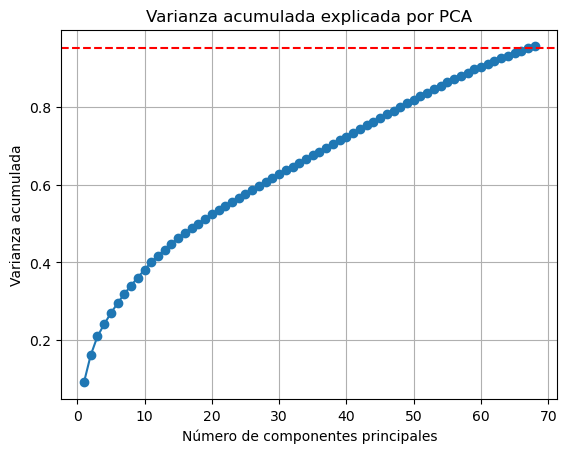

In [591]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Seleccionar columnas numéricas (excluye strings y categorías)
X_numericas = df_ingreso.select_dtypes(include=['float64', 'int64', 'int8', 'bool'])

# Paso 2: Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericas)

# Paso 3: Aplicar PCA para encontrar cuántos componentes explican el 95% de la varianza
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Paso 4: Ver resultados
print(f"Número de componentes seleccionados: {pca.n_components_}")
print(f"Nueva forma del dataset reducido: {X_pca.shape}")

# Paso 5 (opcional): Visualizar varianza acumulada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()


## **Sección 4: Modelo Predictivo y Evaluación**

### **Creación Modelos**

1. Train and evaluate at least three different regression models. Suggested:
→ Linear Regression (baseline).
→ Random Forest Regressor.
→ XGBoost Regressor or Lasso/Ridge.

### **K-Fold Cross-Validation / Hyperparameter tuning**

2. Use k-fold cross-validation and hyperparameter tuning where appropriate.

### **Evaluación Modelos**

3. Evaluate all models using:
→ R2
score (explained variance).
→ Root Mean Squared Error (RMSE).
→ Mean Absolute Error (MAE).

### **Modelo Final**

4. Justify your final model selection based on both accuracy and interpretability.

### **Análisis de Importancia de Variables y Explicabilidad**

5. Analyze variable importance and explainability (e.g., SHAP, permutation importance).

## **Sección 5: Análisis Exploratorio y Brechas Estructurales**

Based on descriptive analysis and statistical testing, explore the following research questions:
1. Gender wage gap: Is there a systematic difference in income between men and women?
Has it changed between 2021 and 2024? If so, then. Which ethnic, age, cities and jobs
affect the most? How does the hours dedicated to housework and taking care of elderly
and children affect the gap?
2. Ethnic disparities: Do ethnic groups consistently earn less, controlling for other characteristics? Which groups, ie. black/afrocolombian/afroamerican/raizal/palenquero, native
groups specify the ethnic group (Wayuu, Zenú, Muisca, Huitoto, etc.), rom, etc. and with
what intensity?
3. Regional differences: Which regions or departments show persistent salary disadvantages?
4. Educational impact: How much additional income is associated with completing secondary or higher education? What degrees are related to higher income?
5. Occupational premiums: Which sectors or contract types are most strongly associated
with higher income?
Use visualizations (boxplots, violin plots, grouped bar charts) and appropriate statistical
tests (T-test, ANOVA, chi-square) to support your findings. Use them to respond to these
hypotheticals and questions:
1. A life story: You are a 17-year-old native woman living in a city in the Caribean coast,
you live with your parents, grandparents, and three siblings. Any of your parents reached
11th grade, you spend 10 hours taking care of your grandparents and siblings, 10 hours
doing housework. Currently, you work in a phone case store. You are the smartest person
in your public school and one of the best Saber11 in the country, and after years of backbreaking effort, you just received an scholarship to study any career at any university you
want. Which undergraduate degree will bring you the highest income? How much? How
much money will you make in comparison with somebody who chooses that career but
comes from a wealthy 17-year-old man from a white/mixed family from Bogotá who spends
2 hours a week doing housework taking care of his family and 2 hours doing housework
and both parents have masters degrees? An how much in comparison to a woman with
those characteristics but without university education?
2. A personal example: Try to predict the loss of income of a women in your family for
the fact of being a woman, keeping everything constant. Calculate the effect of a single
aditional hour of house work / taking care of children and elderly in her income
3. A small step in the rigth direction: Take a city of the dataset and try to find the
single most important aspect that increases the income of their people and explain it.
4. A household affair: Imagine that after a lengthy discussion in your company you have
been sent to the city of Villavicencio as a Data Scientist in the Oil Field of the Eastern
Plains. Your company decides to finance a project to improve the quality of life of single
mothers in the department as part of their PR campaign, and they have asked you What
is the most important thing that we could change to improve the income of single parent
households in the department

## **Sección 6: Aplicación**

1. Build a simple user-facing app that allows prediction of income given demographic and
occupational inputs.
2. Use Streamlit, Gradio, or a Colab interactive form.
3. Include:
→ Input form with user-selectable options.
→ Model prediction output (value + optional interpretation).
→ Link or guide to run the app locally or online.
4. Include an “About” or “Credits” section with authorship and model limitations.